In [626]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [627]:
df = pd.read_csv('Advertising.csv')

In [628]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [629]:
df.rename(columns = {'Unnamed: 0':'Index'},inplace=True)

In [630]:
df.set_index('Index',inplace=True)

In [631]:
df

,TV,radio,newspaper,sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [632]:
#Statistical summary
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [633]:
df.shape

(200, 4)

In [634]:
#Column Data type
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

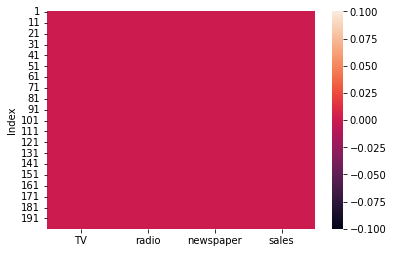

In [635]:
#Checking null values using heatmap
sns.heatmap(df.isnull())
plt.show()

In [636]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

0

In [637]:
#number of null values in each column
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [638]:
#Making dataframe of Continous data
df_visualisation_continous = df[['TV','radio','newspaper','sales']].copy()

<AxesSubplot:xlabel='TV', ylabel='Density'>

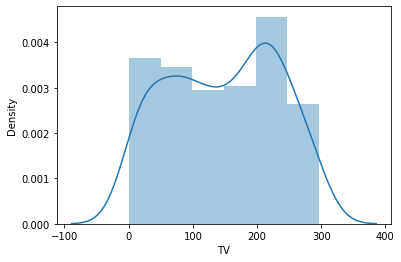

In [639]:
#Visualisation of TV data
sns.distplot(df_visualisation_continous['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

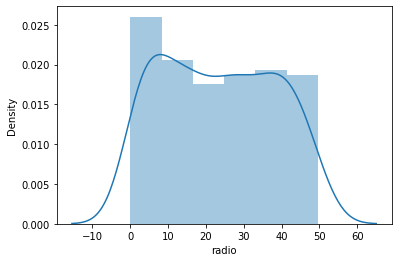

In [640]:
#Visualisation of Radio data
sns.distplot(df_visualisation_continous['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

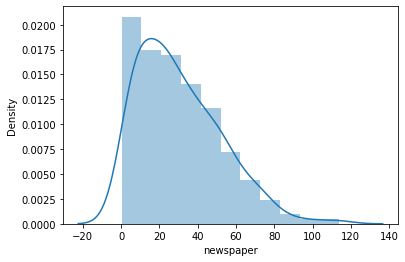

In [641]:
#Visualisation of Newspaper data
sns.distplot(df_visualisation_continous['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

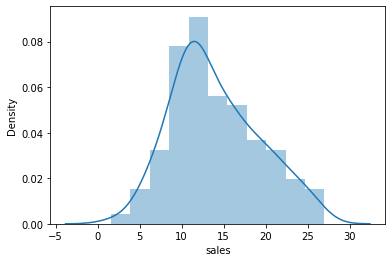

In [642]:
#Visualisation of sales data
sns.distplot(df_visualisation_continous['sales'])

Visualisation is completed

No use of Encoding of Dataframe(Converting String to numeric) because already all are numeric

<AxesSubplot:>

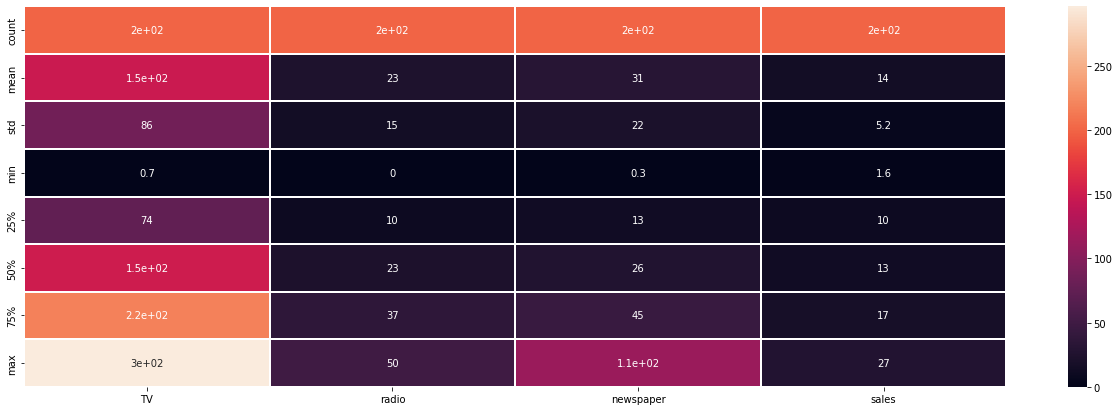

In [643]:
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True, linewidths=0.1)

In [644]:
#Correlation of Columns with target column
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

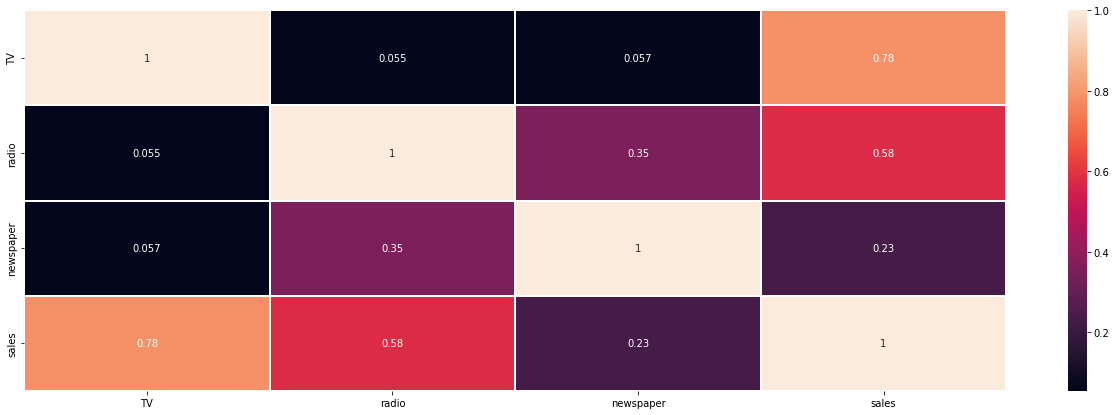

In [645]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (22,7))
sns.heatmap(df.corr(),annot = True, linewidths=0.1)

In [573]:
#Checking columns which appear to be highly correlated with target columns

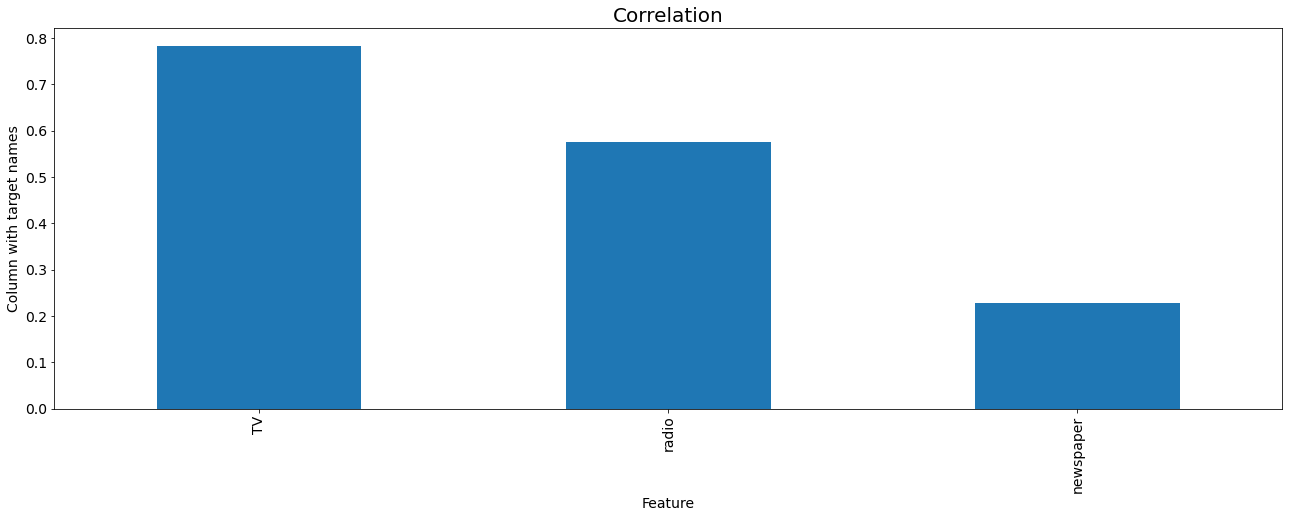

In [646]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending = False).drop(['sales']).plot(kind='bar',fontsize=14)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

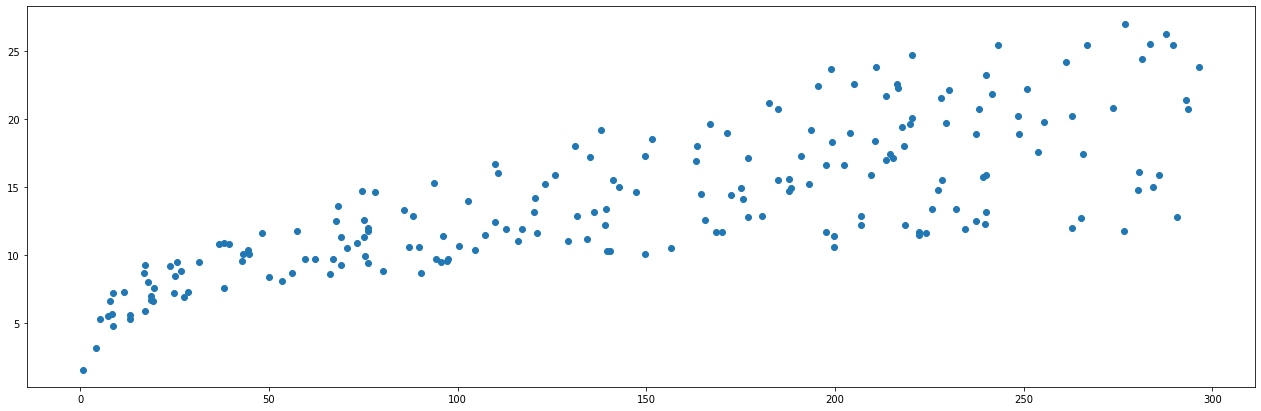

In [648]:
#Checking correlation between TV and sales
plt.figure(figsize=(22,7))
plt.scatter(df.TV,df.sales)
plt.show()

In [650]:
# calculate covariance matrix between TV and sales
covariance = np.cov(df.TV, df.sales)
print(covariance)

[[7370.94989322  350.39019472]
 [ 350.39019472   27.22185302]]


The covariance between the two variables is 350.39 . We can see that variables change in the same direction.

In [651]:
#Using pearson's correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(df.TV, df.sales)
corr

0.7822244248616064

In [652]:
#We need to drop TV as it is highly correlated to target data and also has dual nodes in distribution plot
df = df.drop("TV", axis=1)

In [654]:
df

,radio,newspaper,sales
Index,,,
1,37.8,69.2,22.1
2,39.3,45.1,10.4
3,45.9,69.3,9.3
4,41.3,58.5,18.5
5,10.8,58.4,12.9
...,...,...,...
196,3.7,13.8,7.6
197,4.9,8.1,9.7
198,9.3,6.4,12.8


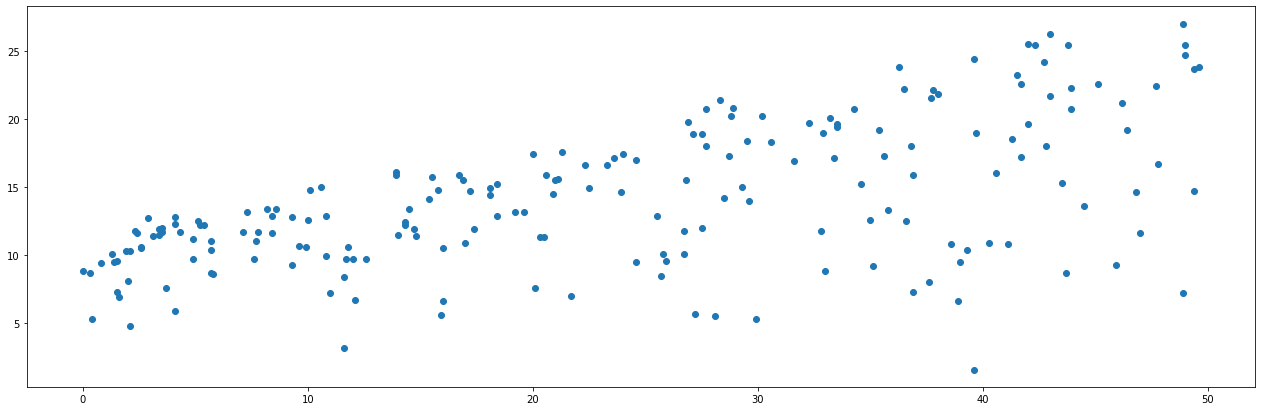

In [655]:
#Checking correlation between radio and sales
plt.figure(figsize=(22,7))
plt.scatter(df.radio,df.sales)
plt.show()

In [656]:
#Removing skewness
df.skew()

radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Acceptable skewness (-0.65,+0.65)

In [657]:
#Outlier check
df.dtypes

radio        float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot:>

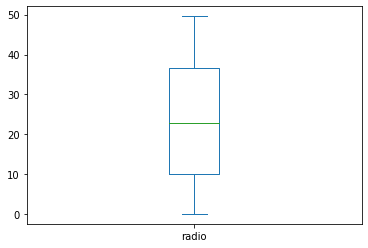

In [659]:
#Age and fare were the only continous data types
df['radio'].plot.box()

<AxesSubplot:>

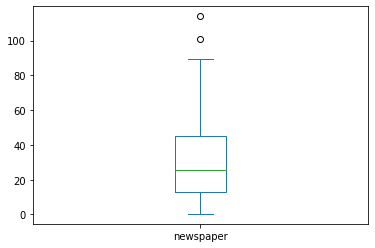

In [660]:
df['newspaper'].plot.box()

In [661]:
#Outlier removal using z-score
df.shape

(200, 3)

In [662]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([ 16, 101]), array([1, 1]))

In [663]:
df_new_z = df[(z<3).all(axis = 1)]
df_new_z

,radio,newspaper,sales
Index,,,
1,37.8,69.2,22.1
2,39.3,45.1,10.4
3,45.9,69.3,9.3
4,41.3,58.5,18.5
5,10.8,58.4,12.9
...,...,...,...
196,3.7,13.8,7.6
197,4.9,8.1,9.7
198,9.3,6.4,12.8


In [664]:
df_new_z.shape

(198, 3)

In [665]:
#Data Loss
Data_loss = (200-198)/200*100
Data_loss

1.0

Separating the columns into features and target

In [666]:
feature = df_new_z.drop("sales",axis=1)
target = df_new_z["sales"]

In [711]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [712]:
import warnings
warnings.filterwarnings('ignore')

In [713]:
for i in range(0,100):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(r2_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(r2_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.33044204575133107
At random state 0 the testing accuracy is : 0.33531898299357776


At random state 1 the training accuracy is : 0.30181294050538054
At random state 1 the testing accuracy is : 0.417295196950614


At random state 2 the training accuracy is : 0.35410235800600076
At random state 2 the testing accuracy is : 0.23721909535001207


At random state 3 the training accuracy is : 0.32541460402182387
At random state 3 the testing accuracy is : 0.34997756103220445


At random state 4 the training accuracy is : 0.35086624907057273
At random state 4 the testing accuracy is : 0.1995813159391805


At random state 5 the training accuracy is : 0.3555860304783759
At random state 5 the testing accuracy is : 0.13382799418676683


At random state 6 the training accuracy is : 0.33029623118924156
At random state 6 the testing accuracy is : 0.3213276051487173


At random state 7 the training accuracy is : 0.3348066079796068
At random state 7 the te

At random state 72 the training accuracy is : 0.30062615336391807
At random state 72 the testing accuracy is : 0.4415389231016953


At random state 73 the training accuracy is : 0.36418552984367636
At random state 73 the testing accuracy is : 0.16818424246173203


At random state 74 the training accuracy is : 0.28721875061078916
At random state 74 the testing accuracy is : 0.3320854915664585


At random state 75 the training accuracy is : 0.3364288210683597
At random state 75 the testing accuracy is : 0.2284121512669114


At random state 76 the training accuracy is : 0.31310761149414457
At random state 76 the testing accuracy is : 0.3985634664043619


At random state 77 the training accuracy is : 0.32008911945983265
At random state 77 the testing accuracy is : 0.3599170001687674


At random state 78 the training accuracy is : 0.39303444890524186
At random state 78 the testing accuracy is : -0.047504857930482425


At random state 79 the training accuracy is : 0.3220260101365562
At rando

In [714]:
features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 6)

In [715]:
lr.fit(features_train,target_train)

LinearRegression()

In [716]:
pred_test = lr.predict(features_test)

In [717]:
print(r2_score(target_test,pred_test))

0.3213276051487173


Cross Validation of model

In [722]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)

In [723]:
from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,feature,target,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is 0.27144898222721753 and accuracy score for training is -0.30162766655071893 and accuracy score for testing is 0.3213276051487173


At cross fold 3 the cv score is 0.2922759198365716 and accuracy score for training is -0.30162766655071893 and accuracy score for testing is 0.3213276051487173


At cross fold 4 the cv score is 0.29321446397621376 and accuracy score for training is -0.30162766655071893 and accuracy score for testing is 0.3213276051487173


At cross fold 5 the cv score is 0.2918375080517156 and accuracy score for training is -0.30162766655071893 and accuracy score for testing is 0.3213276051487173


At cross fold 6 the cv score is 0.25986448868661544 and accuracy score for training is -0.30162766655071893 and accuracy score for testing is 0.3213276051487173


At cross fold 7 the cv score is 0.252570910888477 and accuracy score for training is -0.30162766655071893 and accuracy score for testing is 0.3213276051487173


At cross fold 8 the cv sco

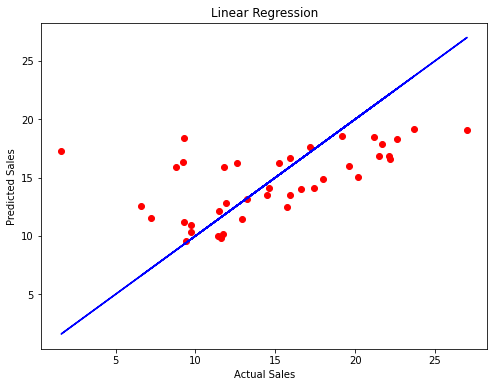

In [724]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression')
plt.show()

linear Regression gives not too good result. For better result we need hundreds of thousands of data points

Regularization:

In [725]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [727]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [729]:
ls = Lasso(alpha = 1, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.32058613052883334

In [738]:
cv_score = cross_val_score(ls,feature,target,cv=2)
cv_mean =cv_score.mean()
cv_mean

0.2793853266705552

Ensemble technique:

In [740]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'], 'max_features': ["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [741]:
rf = RandomForestRegressor(criterion = "mae", max_features = "log2")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score: ', rfs*100)

rfscore = cross_val_score(ls,feature,target,cv=2)
rfc =rfscore.mean()
rfc
print('Cross Validation score: ', rfc*100)

R2 score:  31.068834094331855
Cross Validation score:  27.938532667055522


Conclusion : Reason why we are getting so low scores are due to lack of sufficient data